# KÜTÜPHANE VE AYARLAMALAR

In [1]:
# ################# I M P O R T S ################# #
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingRegressor, VotingClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import joblib
import warnings

# ################# S E T T I N G S ################# #
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df=pd.read_csv(r"data/step6_encoded_remastered.csv")

In [3]:
# Rasgele 8 gözlem seçip gözlemleyelim
df.sample(8).sort_index()

,LEVEL,EXPERIENCE,POSITION_CTO,POSITION_DATA SCIENTIST,POSITION_DATABASE ADMIN,POSITION_DEVOPS ENGINEER,POSITION_EMBEDDED SOFTWARE DEVELOPER,POSITION_FRONT-END DEVELOPER,POSITION_FULL STACK DEVELOPER,POSITION_GAME DEVELOPER,POSITION_MOBILE APPLICATION DEVELOPER,POSITION_OTHER,POSITION_QA / TEST AUTOMATION DEVELOPER,POSITION_SOFTWARE ARCHITECT,POSITION_SOFTWARE DEVELOPMENT MANAGER,POSITION_TEAM / TECH LEAD,GENDER_Kadın,COMPANY_Dijital / Reklam Ajansı,COMPANY_E-Ticaret,COMPANY_Fintech / Finans,COMPANY_Kurumsal,COMPANY_Outsource,COMPANY_Oyun,COMPANY_Startup,COMPANY_Yazılım & Teknoloji,WORK_TYPE_Geçici Remote,WORK_TYPE_Hibrit,WORK_TYPE_Ofis,WORK_TYPE_Remote,CITY_yurt_ici,CURRENCY_GBP,CURRENCY_TRY,CURRENCY_USD,SALARY_AVG_TL
265,2,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,25499
870,2,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,22499
1941,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,7499
2356,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,68135
3447,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,65195
3596,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,195605
4107,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,24499
4171,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,24499


In [4]:
# Tüm değişkenleri görelim
df.columns

Index(['LEVEL', 'EXPERIENCE', 'POSITION_CTO', 'POSITION_DATA SCIENTIST', 'POSITION_DATABASE ADMIN', 'POSITION_DEVOPS ENGINEER', 'POSITION_EMBEDDED SOFTWARE DEVELOPER', 'POSITION_FRONT-END DEVELOPER', 'POSITION_FULL STACK DEVELOPER', 'POSITION_GAME DEVELOPER', 'POSITION_MOBILE APPLICATION DEVELOPER', 'POSITION_OTHER', 'POSITION_QA / TEST AUTOMATION DEVELOPER', 'POSITION_SOFTWARE ARCHITECT', 'POSITION_SOFTWARE DEVELOPMENT MANAGER', 'POSITION_TEAM / TECH LEAD', 'GENDER_Kadın', 'COMPANY_Dijital / Reklam Ajansı', 'COMPANY_E-Ticaret', 'COMPANY_Fintech / Finans', 'COMPANY_Kurumsal', 'COMPANY_Outsource', 'COMPANY_Oyun', 'COMPANY_Startup', 'COMPANY_Yazılım & Teknoloji', 'WORK_TYPE_Geçici Remote', 'WORK_TYPE_Hibrit', 'WORK_TYPE_Ofis', 'WORK_TYPE_Remote', 'CITY_yurt_ici', 'CURRENCY_GBP', 'CURRENCY_TRY', 'CURRENCY_USD', 'SALARY_AVG_TL'], dtype='object')

# GRADIENT BOOSTING REGRESSOR

### 1. Model Kurma

In [5]:
# Bağımlı değişkeni dışarıda bırakıp geride kalan tüm (bağımsız) değişkenleri bir df'e atayalım
X = df.drop(["SALARY_AVG_TL"], axis=1)

# Bağımlı değişkenimizi ayrı bir df'e atayalım
y = df[["SALARY_AVG_TL"]].values.ravel()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [7]:
# Doğrulama
X.columns

Index(['LEVEL', 'EXPERIENCE', 'POSITION_CTO', 'POSITION_DATA SCIENTIST', 'POSITION_DATABASE ADMIN', 'POSITION_DEVOPS ENGINEER', 'POSITION_EMBEDDED SOFTWARE DEVELOPER', 'POSITION_FRONT-END DEVELOPER', 'POSITION_FULL STACK DEVELOPER', 'POSITION_GAME DEVELOPER', 'POSITION_MOBILE APPLICATION DEVELOPER', 'POSITION_OTHER', 'POSITION_QA / TEST AUTOMATION DEVELOPER', 'POSITION_SOFTWARE ARCHITECT', 'POSITION_SOFTWARE DEVELOPMENT MANAGER', 'POSITION_TEAM / TECH LEAD', 'GENDER_Kadın', 'COMPANY_Dijital / Reklam Ajansı', 'COMPANY_E-Ticaret', 'COMPANY_Fintech / Finans', 'COMPANY_Kurumsal', 'COMPANY_Outsource', 'COMPANY_Oyun', 'COMPANY_Startup', 'COMPANY_Yazılım & Teknoloji', 'WORK_TYPE_Geçici Remote', 'WORK_TYPE_Hibrit', 'WORK_TYPE_Ofis', 'WORK_TYPE_Remote', 'CITY_yurt_ici', 'CURRENCY_GBP', 'CURRENCY_TRY', 'CURRENCY_USD'], dtype='object')

In [8]:
# Modeli train seti üzerinde kuralım
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

**Feature Importance Plot**

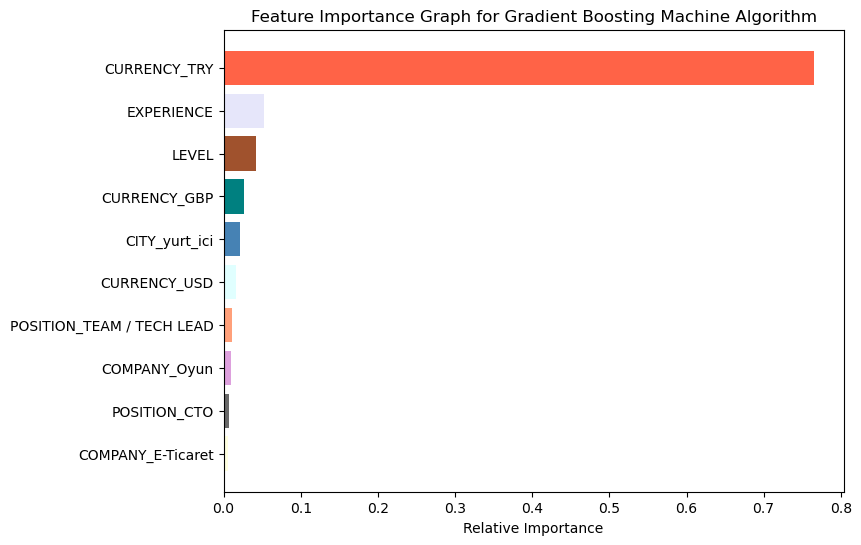

In [9]:
features = X_train.columns
importances = gbr_model.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10 

plt.figure(figsize=(8,6))
plt.title('Feature Importance Graph for Gradient Boosting Machine Algorithm')

# color_list = ['green', 'gray', 'blue', 'orange', 'magenta', 'purple', 'cyan', 'olive', 'chartreuse', 'red']
color_list = ["#ffffe0", "#696969", "#dda0dd", "#ffa07a",  "#e0ffff", \
"#4682b4", "#008080", "#a0522d", "#e6e6fa", "#ff6347"]

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color=color_list, align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

### 2. İlk Model Başarısını Değerlendirme

**Test RMSE**

In [10]:
# Train seti üzerinden kurduğumuz modeli test seti üzerinde kullanıp ort hata miktarına bakıyoruz
np.mean((-1) * cross_val_score(gbr_model,
                               X_test,
                               y_test,
                               cv=5,
                               scoring='neg_root_mean_squared_error'))

18848.801271076176

**Test R Kare**

In [11]:
np.mean(cross_val_score(gbr_model,
                        X_test,              # Bağımsız değişkenler
                        y_test,              # Bağımlı değişken
                        cv=5,
                        scoring='r2'))

0.549971141831868

### 3. Hiperparametre Optimizasyonu

Modelimizin tahmin başarısını artırmak adına şu parametrelerin varsayılan değerlerini değiştirebiliriz:
- n_estimators: 100
- max_depth: 3
- learning_rate: 0.1
- min_samples_split: 2
- subsample: 1.0

Her bir parametre için bu değerleri de içeren ve bu değerlere yakın parametre listeleri oluşturup en iyilerini bulmaya çalışacağız.

In [ ]:
"""
parameters = {'n_estimators'        : [50, 100, 150, 500, 750, 1000],
              'max_depth'           : [1, 3, 5, 7, 10],
              'learning_rate'       : [0.01, 0.05, 0.1],
              'min_samples_split'   : [0.1, 0.3, 0.5, 0.7, 0.8, 1.0],
              'subsample'           : [0.5, 0.7, 1.0]
             }
"""

In [ ]:
# Bu işlem biraz uzun sürebilir.
""" 
grid = GridSearchCV(estimator=gbr_model,    # Model object
                    param_grid = parameters,
                    cv = 2,     # Number of folds for Cross Validation 
                    n_jobs=-1)  # Use all processors to maximize performance

grid.fit(X_train, y_train)
"""

**Bulunan En İyi Parametre Değerleri**

In [12]:
# grid.best_params_

Bulduğumuz en iyi değerleri bir sözlüğe kaydedelim ki her seferinde GridSearchCV çalıştırmak çalıştırmak zorunda kalmayalım.

In [13]:
best_hipars = {'learning_rate': 0.05,
               'max_depth': 3,
               'min_samples_split': 0.5,
               'n_estimators': 750,
               'subsample': 0.7}

In [14]:
# Modeli en iyi parametre değerleri ile tekrar fit edelim
gbr_final = gbr_model.set_params(**best_hipars).fit(X, y)

In [15]:
# Bakalım yeni parametreler modelimize uygulanmış mı
gbr_final.get_params()  # BİNGO !

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.05,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 0.5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 750,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 0.7,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### 4. Final Model Başarı Değerlendirme

Bakalım yaptığımız değişiklikler model başarısını nasıl etkilemiş

**RMSE**

In [16]:
np.mean((-1) * cross_val_score(gbr_final,
                               X_test,
                               y_test,
                               cv=5,
                               scoring='neg_root_mean_squared_error'))

17836.472982455693

**R Kare**

In [18]:
np.mean(cross_val_score(gbr_final,
                        X_test,         # Bağımsız değişkenler
                        y_test,         # Bağımlı değişken
                        cv=5,
                        scoring='r2'))
# 0.61

0.6075813584818262

### 5. Tahmin

In [19]:
# Veri setinden rasgele bir gözlem birimi seçelim
ran_obs = df.sample(1)
ran_obs

,LEVEL,EXPERIENCE,POSITION_CTO,POSITION_DATA SCIENTIST,POSITION_DATABASE ADMIN,POSITION_DEVOPS ENGINEER,POSITION_EMBEDDED SOFTWARE DEVELOPER,POSITION_FRONT-END DEVELOPER,POSITION_FULL STACK DEVELOPER,POSITION_GAME DEVELOPER,POSITION_MOBILE APPLICATION DEVELOPER,POSITION_OTHER,POSITION_QA / TEST AUTOMATION DEVELOPER,POSITION_SOFTWARE ARCHITECT,POSITION_SOFTWARE DEVELOPMENT MANAGER,POSITION_TEAM / TECH LEAD,GENDER_Kadın,COMPANY_Dijital / Reklam Ajansı,COMPANY_E-Ticaret,COMPANY_Fintech / Finans,COMPANY_Kurumsal,COMPANY_Outsource,COMPANY_Oyun,COMPANY_Startup,COMPANY_Yazılım & Teknoloji,WORK_TYPE_Geçici Remote,WORK_TYPE_Hibrit,WORK_TYPE_Ofis,WORK_TYPE_Remote,CITY_yurt_ici,CURRENCY_GBP,CURRENCY_TRY,CURRENCY_USD,SALARY_AVG_TL
318,2,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,83825


In [20]:
# Hedef değişken hariç diğerlerine ait gözlem değerlerini alalım
ran_obs_ind = ran_obs.loc[:, df.columns != 'SALARY_AVG_TL']
ran_obs_ind

,LEVEL,EXPERIENCE,POSITION_CTO,POSITION_DATA SCIENTIST,POSITION_DATABASE ADMIN,POSITION_DEVOPS ENGINEER,POSITION_EMBEDDED SOFTWARE DEVELOPER,POSITION_FRONT-END DEVELOPER,POSITION_FULL STACK DEVELOPER,POSITION_GAME DEVELOPER,POSITION_MOBILE APPLICATION DEVELOPER,POSITION_OTHER,POSITION_QA / TEST AUTOMATION DEVELOPER,POSITION_SOFTWARE ARCHITECT,POSITION_SOFTWARE DEVELOPMENT MANAGER,POSITION_TEAM / TECH LEAD,GENDER_Kadın,COMPANY_Dijital / Reklam Ajansı,COMPANY_E-Ticaret,COMPANY_Fintech / Finans,COMPANY_Kurumsal,COMPANY_Outsource,COMPANY_Oyun,COMPANY_Startup,COMPANY_Yazılım & Teknoloji,WORK_TYPE_Geçici Remote,WORK_TYPE_Hibrit,WORK_TYPE_Ofis,WORK_TYPE_Remote,CITY_yurt_ici,CURRENCY_GBP,CURRENCY_TRY,CURRENCY_USD
318,2,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1


In [21]:
# Bu gözlem birimi için tahmin işlemi yapalım
pred_val = int(gbr_final.predict(ran_obs_ind))

In [22]:
# Sonuçları mukayese edelim
print(f"Gerçek değer\t: {int(ran_obs['SALARY_AVG_TL'].values)}")
print(f"Tahmin değeri\t: {pred_val}")

Gerçek değer	: 83825
Tahmin değeri	: 73486


**Actual vs Predicted Graph**

In [23]:
y_pred_test = gbr_final.predict(X_test)

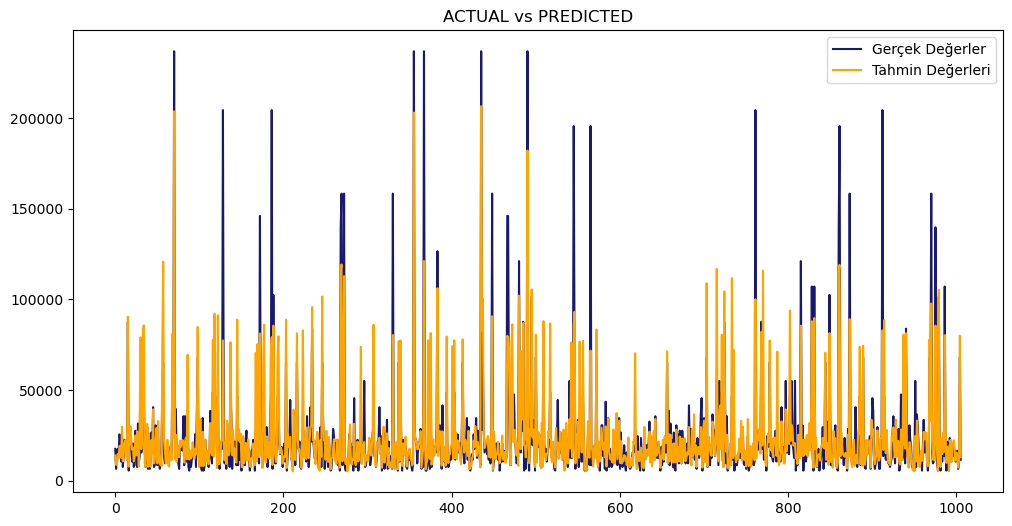

In [24]:
# figure size
plt.figure(figsize=(12, 6))

# actual values
plt.plot([i for i in range(len(y_test))], y_test, c='#191970', label="Gerçek Değerler")

# predicted values
plt.title("ACTUAL vs PREDICTED")
plt.plot([i for i in range(len(y_test))], y_pred_test, c='#FFA500', label="Tahmin Değerleri")
plt.legend()
plt.show()

Son olarak gerçek değerler ile tahmin değerlerini ayrı bir veri setinde birleştirelim

In [25]:
df_final = pd.DataFrame()   # Yeni bir df tanımla
df_final["ACTUAL_AVG_TL"] = y     # Gerçek değerleri bir değişken olarak ekle

In [26]:
# Tüm gözlem birimleri için tahmin işlemi yapıp sonuçları sakla
y_pred_all = gbr_final.predict(X)

In [27]:
# Veri setine bu tahmin değerlerini ikinci bir değişken olarak ekle
df_final["PREDICTED_AVG_TL"] = y_pred_all

In [28]:
df_final["PREDICTED_AVG_TL"] = df_final["PREDICTED_AVG_TL"].astype(int)

In [29]:
# Bu veri setinden rasgele 20 gözlemlik bir örneklem al, indekse göre sıralayarak göster
df_final.sample(10)

,ACTUAL_AVG_TL,PREDICTED_AVG_TL
1474,14499,10237
1520,15499,22175
267,22499,21913
2786,12499,11481
736,7499,5423
2554,10499,10371
968,7499,5608
1624,7499,20792
4449,30499,23675
956,146628,129535


### 6. Sonuç

İlk haliyle başarı oranı (R-Kare skoru) %54 olan modelimizi hiperparametre optimizasyonu yaparak %61'e çıkardık.

Her ne kadar bir model için düşük başarı skorları gibi görünse de hedef değişkenimizin sürekli sayısal bir değer olduğu ve bağımsız değişkenlerin onu temsil etmede çok çelişkili davrandığı düşünüldüğünde kayda değer bir skor olduğu anlaşılabilir.

## MODEL DOSYASI OLUŞTURMA

In [ ]:
# Modeli dosya şeklinde diske kaydedelim
joblib.dump(gbr_final, "gbr_final.pkl")

In [ ]:
# Şimdi de bu dosyayı okuyalım
gbr_model_from_disc = joblib.load("gbr_final.pkl")

In [ ]:
# Gelen değerleri x değişkenine atadığımızı varsayalım.
# Aşağıdaki komutla x'i dataframe'e çevirip tahmin işlemi isteyebiliriz.
# gbr_model_from_disc.predict(pd.DataFrame(x).T)